In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# dataset real: Zuzanna's photo
# Link: https://drive.google.com/drive/folders/1UYo8nV_uKaXUnlsHGz6xkQ9GSZVL-WtC?usp=share_link
# size: large


# fake dataset: stable diffusion v2, generated with random prompts (chatGPT)
# size: 768x768
# Link: https://drive.google.com/drive/folders/1q9scsj0mzq0wCL_kkc6NFugFk_TAvlt2?usp=share_link

In [4]:
# The results for the datasets above, using code : https://github.com/rezashkv/gen-image-detector/blob/main/gradient/detect_local.py
# results in file: https://drive.google.com/drive/folders/1yOgytWlrtjojKTFDHIEa3otAeaX1faC6?usp=share_link

path_1 = '/content/drive/MyDrive/CMSC673/Final_presentation/Data/result_gradient_real_Zuzanna_fake_photo'

results_dataset = []
for name in os.listdir(path_1):
  results_dataset.append(name)

In [5]:
i = 0
for i, file_csv in enumerate(results_dataset):
  df1 = pd.read_csv(path_1 + '/' + file_csv)
  new_col_name = file_csv[13:17] + '_' + file_csv[20:-4]
  df1 = df1.rename(columns={"errors": new_col_name})
  if i == 0:
    df = df1
  else:
    df = df1.join(df)

In [6]:
df

,real_100,real_20,fake_50,fake_100,real_75,fake_20,fake_75,real_50
0,0.002878,0.000730,0.004039,0.013295,0.002565,0.001376,0.008520,0.001532
1,0.003286,0.000672,0.003762,0.009842,0.001999,0.001297,0.006343,0.001585
2,0.003473,0.001088,0.002589,0.010758,0.003181,0.001671,0.004814,0.001911
3,0.002221,0.000600,0.001718,0.005326,0.001959,0.000690,0.004763,0.001180
4,0.003512,0.001105,0.004479,0.008987,0.003093,0.001722,0.005330,0.001856
...,...,...,...,...,...,...,...,...
95,0.002874,0.000634,0.005127,0.011138,0.002916,0.001247,0.005637,0.001624
96,0.002760,0.001194,0.001504,0.004693,0.002328,0.000578,0.002330,0.001701
97,0.004214,0.001194,0.004490,0.009706,0.003213,0.002233,0.005939,0.001744
98,0.003754,0.000941,0.002369,0.004859,0.003244,0.001428,0.004351,0.001992


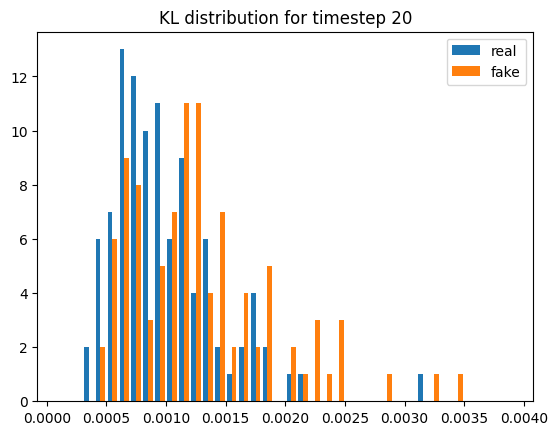

In [7]:
bins = [float(i) / 10000 for i in range(1, 40)]
plt.hist([df['real_20'], df['fake_20']], bins = bins)
plt.title("KL distribution for timestep 20")
plt.legend(['real', 'fake'])
plt.show()

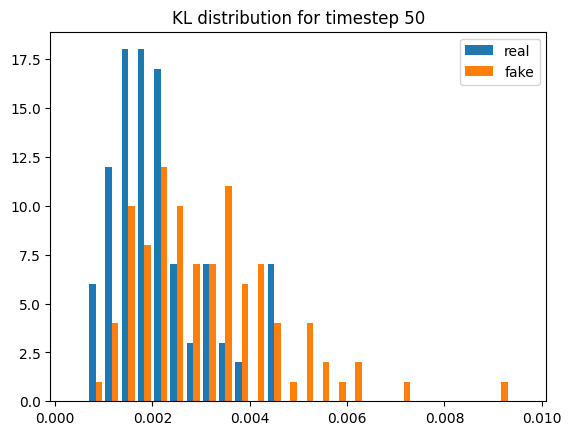

In [8]:
bins = [float(i) / 3000 for i in range(1, 30)]

plt.hist([df['real_50'], df['fake_50']], bins = bins)
plt.title("KL distribution for timestep 50")
plt.legend(['real', 'fake'])
plt.show()

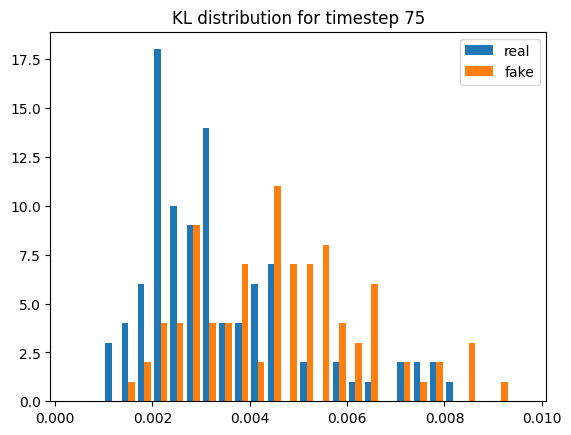

In [9]:
bins = [float(i) / 3000 for i in range(1, 30)]

plt.hist([df['real_75'], df['fake_75']], bins = bins)
plt.title("KL distribution for timestep 75")
plt.legend(['real', 'fake'])
plt.show()

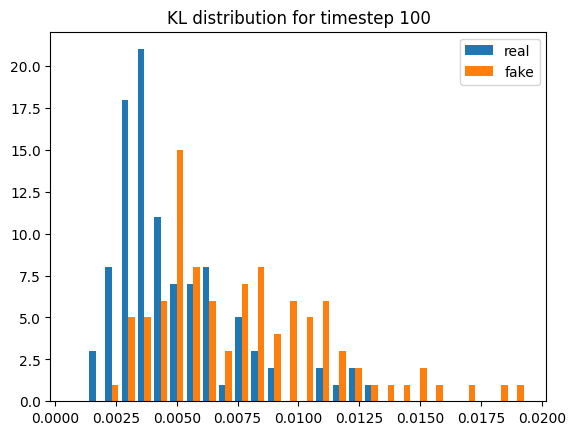

In [10]:
bins = [float(i) / 1500 for i in range(1, 30)]

plt.hist([df['real_100'], df['fake_100']], bins = bins)
plt.title("KL distribution for timestep 100")
plt.legend(['real', 'fake'])
plt.show()

In [11]:
def roc_graph(number_1, df):
  #roc
  errors_fake = list(df[f'fake_{number_1}'])
  errors_real =  list(df[f'real_{number_1}'])
  preds =  errors_fake + errors_real
  preds = [1 - pred for pred in preds]

  t_labels = [1] * len(errors_fake) + [0] * len(errors_real)

  fpr, tpr, thresholds = metrics.roc_curve(t_labels, preds)
  auc = metrics.auc(fpr, tpr)
  acc = np.max(1 - (fpr + (1 - tpr))/2)
  roc_auc = metrics.auc(fpr, tpr)

  err = .01
  low = tpr[np.where(fpr<.01)[0][-1]]

  print(low)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.02f' % roc_auc)
  plt.plot(low, err, 'b', label = 'FPR@TPR < 0.01 = %0.02f' % low)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

20
0.0


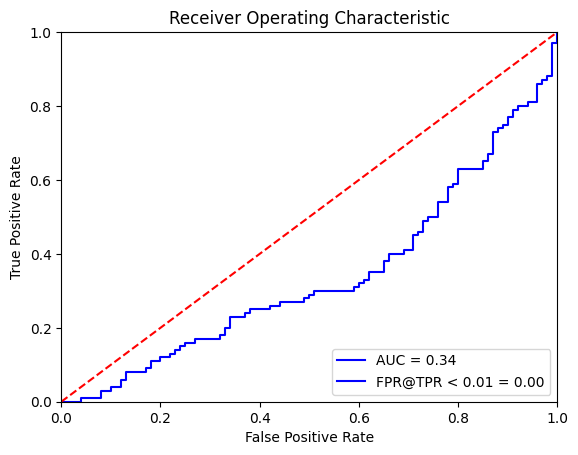

50
0.0


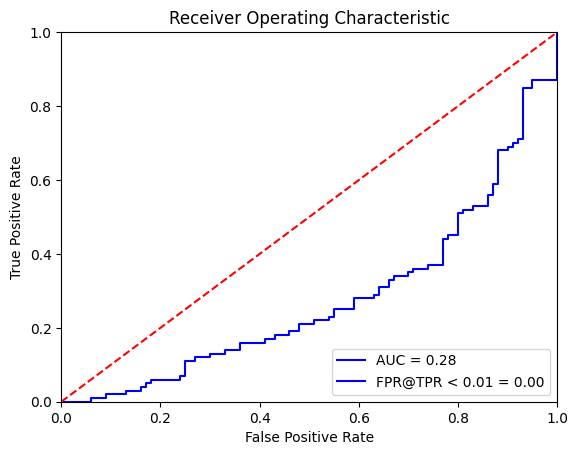

75
0.0


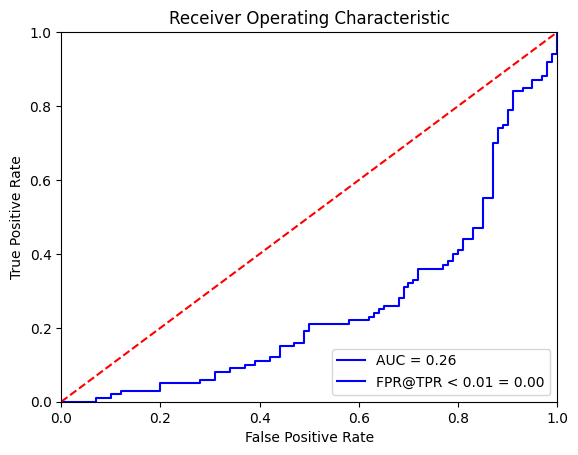

100
0.0


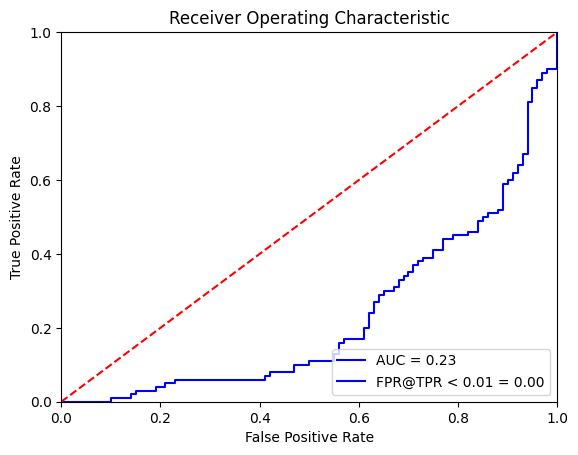

In [12]:
for i in [20,50,75,100]:
  print(i)
  roc_graph(i, df)